In [2]:
#df = si.get_data("AMD")

In [3]:
#df.to_csv('amd_data.csv')

In [4]:
df = pd.read_csv("amd_data.csv")
df

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,1980-03-17,0.000000,3.302083,3.125000,3.145833,3.145833,219600,AMD
1,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200,AMD
2,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200,AMD
3,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600,AMD
4,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800,AMD
...,...,...,...,...,...,...,...,...
10713,2022-09-12,84.889999,85.349998,83.459999,84.639999,84.639999,71922500,AMD
10714,2022-09-13,80.959999,81.470001,76.800003,77.029999,77.029999,80921200,AMD
10715,2022-09-14,77.099998,78.080002,75.870003,77.449997,77.449997,71483000,AMD
10716,2022-09-15,76.639999,77.970001,74.910004,76.660004,76.660004,81818000,AMD


In [5]:
open_nflx = df[['open']]

<AxesSubplot:>

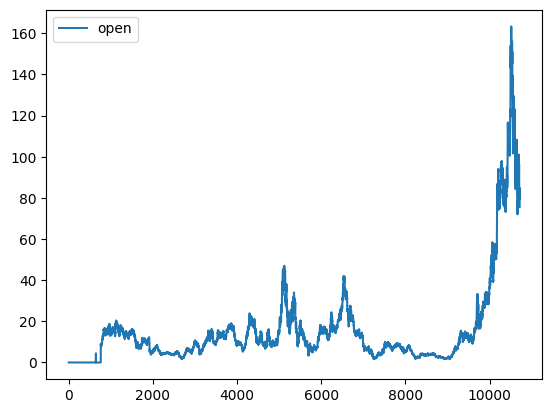

In [6]:
open_nflx.plot()

In [7]:
train = df.iloc[:-2000]
test = df.iloc[-2000:]

In [8]:
test

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
8718,2014-10-08,3.300000,3.310000,3.180000,3.280000,3.280000,28000000,AMD
8719,2014-10-09,3.030000,3.200000,2.940000,2.950000,2.950000,69528900,AMD
8720,2014-10-10,2.950000,2.950000,2.710000,2.720000,2.720000,41062500,AMD
8721,2014-10-13,2.780000,2.850000,2.730000,2.740000,2.740000,38269400,AMD
8722,2014-10-14,2.610000,2.750000,2.600000,2.620000,2.620000,39964200,AMD
...,...,...,...,...,...,...,...,...
10713,2022-09-12,84.889999,85.349998,83.459999,84.639999,84.639999,71922500,AMD
10714,2022-09-13,80.959999,81.470001,76.800003,77.029999,77.029999,80921200,AMD
10715,2022-09-14,77.099998,78.080002,75.870003,77.449997,77.449997,71483000,AMD
10716,2022-09-15,76.639999,77.970001,74.910004,76.660004,76.660004,81818000,AMD


In [9]:
open_nflx = train[['open']]
open_array = open_nflx.values

# Normalizando la data
normalizer = MinMaxScaler(feature_range = (0,1))
data_scaled = normalizer.fit_transform(np.array(open_array).reshape(-1,1))


len(data_scaled), len(open_array)

(8718, 8718)

In [10]:
open_nflx2 = test[['open']]
open_array2 = open_nflx2.values

# Normalizando la data
data_scaled2 = normalizer.fit_transform(np.array(open_array2).reshape(-1,1))


len(data_scaled2), len(open_array2)

(2000, 2000)

In [11]:
X_train = []
Y_train = []

#secuenciamos los datos.
cantidad = data_scaled.shape[0]
ventana = 60
for i in range(ventana, cantidad):
  X_train.append(data_scaled[i - ventana: i, 0])
  Y_train.append(data_scaled[i, 0])
    

x_train = np.array(X_train)
y_train = np.array(Y_train)

x_train.shape, y_train.shape

((8658, 60), (8658,))

In [17]:
X_test = []
Y_test = []

#secuenciamos los datos.
cantidad = data_scaled2.shape[0]
ventana = 60
for i in range(ventana, cantidad):
  X_test.append(data_scaled2[i - ventana: i, 0])
  Y_test.append(data_scaled2[i, 0])
    

x_test = np.array(X_test)
y_test = np.array(Y_test)

x_test.shape, y_test.shape

((1940, 60), (1940,))

In [13]:
forecaster = Sequential()

#capa1
forecaster.add(LSTM(input_shape=(x_train.shape[1], 1), units=50, return_sequences=True))

#capa2
forecaster.add(LSTM(units=50, return_sequences=True))

#capa3
forecaster.add(LSTM(units=50, return_sequences=True))

#capa4 - 
forecaster.add(LSTM(units=75, return_sequences=False))

#capa de salida
forecaster.add(Dense(units=1, activation='relu'))

In [14]:
#parametros de optimización
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#parametros de entrenamiento
forecaster.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
271/271 [==============================] - 19s 56ms/step - loss: 0.0037
Epoch 2/100
271/271 [==============================] - 15s 55ms/step - loss: 7.1880e-04
Epoch 3/100
271/271 [==============================] - 15s 56ms/step - loss: 6.6189e-04
Epoch 4/100
271/271 [==============================] - 15s 57ms/step - loss: 4.9392e-04
Epoch 5/100
271/271 [==============================] - 15s 56ms/step - loss: 4.0207e-04
Epoch 6/100
271/271 [==============================] - 15s 56ms/step - loss: 3.1269e-04
Epoch 7/100
271/271 [==============================] - 15s 56ms/step - loss: 2.4981e-04
Epoch 8/100
271/271 [==============================] - 15s 56ms/step - loss: 2.2224e-04
Epoch 9/100
271/271 [==============================] - 15s 57ms/step - loss: 2.2009e-04
Epoch 10/100
271/271 [==============================] - 15s 57ms/step - loss: 1.8358e-04
Epoch 11/100
271/271 [==============================] - 15s 57ms/step - loss: 2.1382e-04
Epoch 12/100
271/271 [============

In [16]:
forecaster.save('./RNN_v1.h5')

In [12]:
forecaster = tf.keras.models.load_model('./RNN_v1.h5')

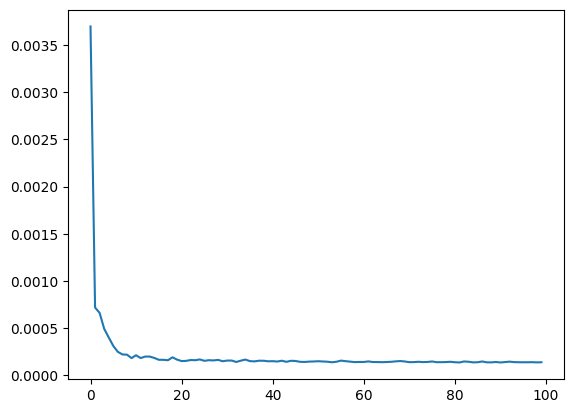

In [18]:
loss = forecaster.history.history["loss"]
plt.plot(loss)

In [19]:
#predicciones en train y test data
train_predict = forecaster.predict(x_train)
test_predict = forecaster.predict(x_test)

61/61 [==============================] - 1s 18ms/step


In [20]:
# obteniendo valores reales
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

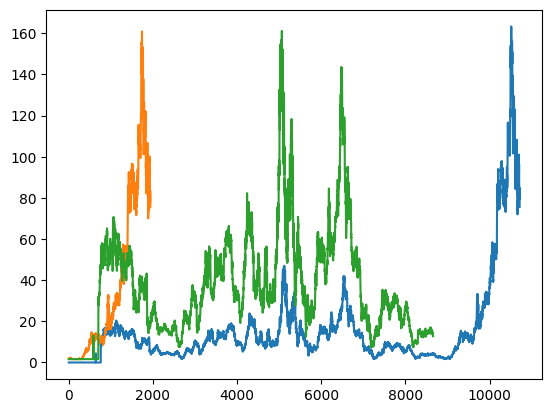

In [21]:
plt.plot(df[['open']])
plt.plot(test_predict)
plt.plot(train_predict)

In [22]:
combinando = np.vstack((train_predict,test_predict))

In [23]:
valores_iniciales = np.vstack((x_train,x_test))
valores_iniciales = normalizer.inverse_transform(valores_iniciales)

In [24]:
combinando.shape, valores_iniciales.shape

((10598, 1), (10598, 60))

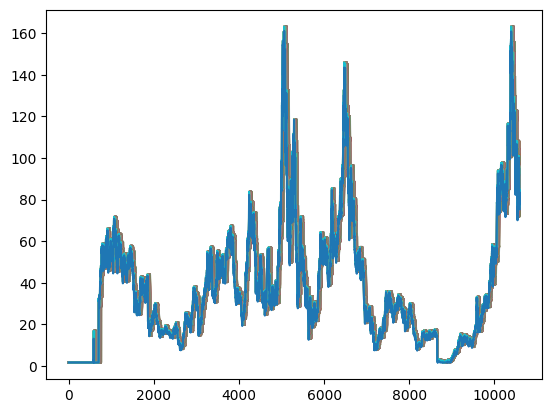

In [25]:
plt.plot(valores_iniciales)
plt.plot(combinando)


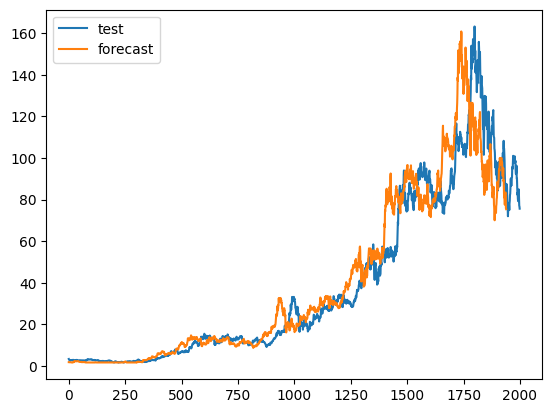

In [35]:

valores_iniciales2 =open_nflx2.values
valores_iniciales2.reshape(-1,1)
#valores_iniciales2.shape
plt.plot(valores_iniciales2 , label='test')
plt.plot(test_predict, label='forecast')
plt.legend()
plt.show()

In [32]:
#n_future = 200
#forecast_test = forecaster.predict(x_train[-n_future:])
#forecast_test = normalizer.inverse_transform(forecast_test)
#forecast_test

In [33]:
#plt.plot(df[['open']])
#plt.plot(forecast_test)

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


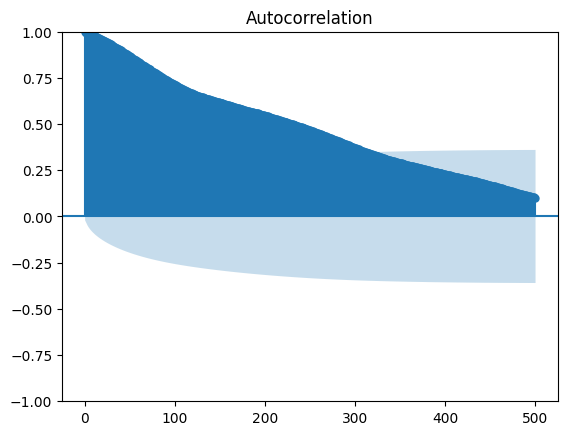

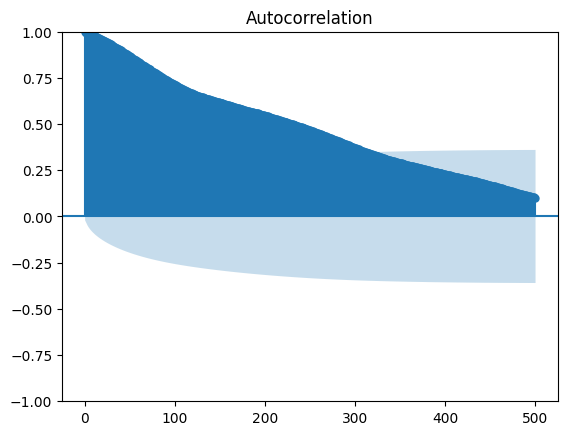

In [31]:
plot_acf(train['open'] , lags=500 )

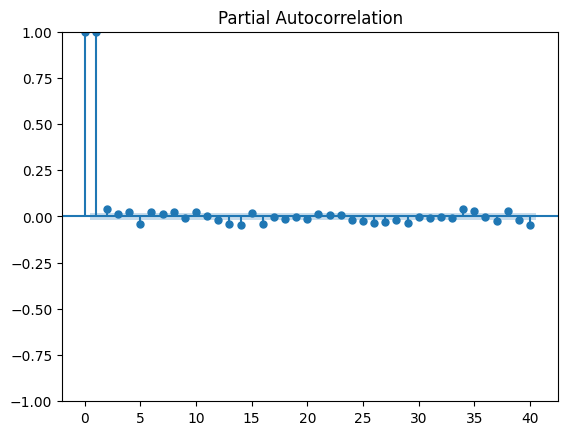

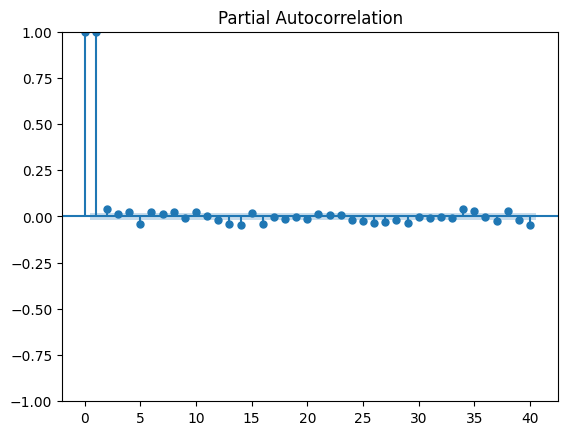

In [29]:
plot_pacf(train['open']  )

In [ ]:
from statsmodels.tsa.arima.model import 

In [18]:
x_train.shape, x_test.shape

((8658, 60), (1940, 60))